# Avocado project

The data provided represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the data reflects an expanded, multi-outlet retail data set. 
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado (Output)
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total bags 
- Small bags
- Large bags
- XLarge bags
- Unnamed column:0

Aim of the project - 
Make a model that can consider the data provided and predict the Average Price

In [201]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [202]:
#Loading data from csv file

data = pd.read_csv('avocado.csv')

In [203]:
#Checking the data
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory data analysis

We will now begin exploring the data, and perform EDA on the data

In [204]:
#Checking data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


The dataframe initially displayed 16468 rows × 14 columns. But the info displays that Non-null values are 1517 for each column.
We will remove the null values from our dataframe further, to provide filtered data to the model.

Also, datatypes for Date and year column are objects. Will need to convert them to relevant types.

Datatypes of rest of the columns are relevant, numeric data has float column types and string data are objects.

In [205]:
#Checking a random sample from data

data.sample(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
12457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation -

We observe that there are rows in the data which have no data at all, they contain NaN values, and are just increasing the number of rows in the dataset

In [206]:
#We will drop the rows which do not have any data except for NaN values

data.dropna(axis = 0, thresh=14, inplace = True)

#The thresh parameter has the value 14 here, since number of columns are 14. We have passed the instruction to keep only those rows which have data in all 14 columns.
#In this way, we remove rows in which all values are NaN.

In [207]:
#Printing the dataset again

data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


After removing the null rows, we have a filtered dataframe with only 1517 rows and 14 columns. We will further perform analysis on this data.

In [208]:
#Checking for null values in the data

data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The data does not indicate any null values. 

However, there is date column which has datatype set as object. We will convert it to Date type, so that the model can better understand the data.

In [209]:
#Converting Date column to Datetime type

data['Date']= pd.to_datetime(data['Date'])

In [210]:
data.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

We have now successfully changed the datatypes of the columns.

We will now try to understand each column and its data.

In [211]:
#Checking data statistics

data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


We see data outcomes as scientific notations. We will apply formatting and then recheck results.

In [212]:
data.describe().apply(lambda s: s.apply('{:.5f}'.format))

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000
mean,26.99539,1.07499,1601879.06784,646438.65411,611437.50259,50405.49540,293597.41574,248773.59529,42642.04937,2181.77107,2015.16282
std,14.84829,0.18889,4433142.82075,1947613.56974,1672906.16466,137781.24924,757976.53132,647476.52050,118215.68184,7455.71214,0.36932
min,0.00000,0.49000,38750.74000,467.72000,1783.77000,0.00000,3311.77000,3311.77000,0.00000,0.00000,2015.00000
25%,14.00000,0.98000,147469.99000,20400.34000,41476.06000,911.25000,36206.89000,29727.22000,540.74000,0.00000,2015.00000
50%,29.00000,1.08000,402791.86000,81751.17000,118664.89000,7688.17000,73979.06000,62375.69000,5044.35000,0.00000,2015.00000
75%,39.00000,1.19000,981975.08000,377578.48000,485150.34000,29167.30000,157609.68000,146199.35000,29267.67000,401.48000,2015.00000
max,51.00000,1.68000,44655461.51000,18933038.04000,18956479.74000,1381516.11000,6736304.04000,5893641.72000,1121076.47000,108072.79000,2016.00000


Following are the statistical observations from the data -

- The unnamed column has value between 0 to 51.
- Average prices for avocados per piece starts from 0.49 and has a maximum price 1.68. 75% values are uptill 1.19 and rest of the values increase with a huge diff (1.19 to 1.68)
- Total volume column has minimum value as 38750.74 and maximum value as 44655461.51. Total volume contains outliers since the value has a steep increase between 75% and max.
- PLU - 4046 column has minimum value 467.72 and maximum value as 18933038.04. PLU-4046 contains outliers since the value has a steep increase between 75% and max.
- PLU - 4225 column has minimum value as 1783.77 and maximum value as 18956479.74. PLU-4225 contains outliers since the value has a steep increase between 75% and max.
- PLU - 4770 has minimum value as 0 and maximum value as 1381516.11. PLU-4770 contains outliers since the value has a steep increase between 75% and max.
- Total bags range between 3311.77 and 6736304.04. Total bags contains outliers since the value has a steep increase between 75% and max.
- Small bags range between 3311.77 and 5893641.72. Small bags contains outliers since the value has a steep increase between 75% and max.
- Large bags range between 0 and 1121076.47. Large bags contains outliers since the value has a steep increase between 75% and max.
- Xlarge bags range between 0 and 108072.79. XLarge bags contains outliers since the value has a steep increase between 75% and max.

We will now plot the fields and check the data visualizations

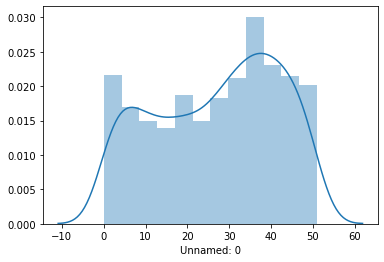

In [213]:
#Plotting the unnamed column

sns.distplot(data['Unnamed: 0'])

(array([167., 129., 115., 120., 120., 150., 180., 195., 178., 163.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <a list of 10 Patch objects>)

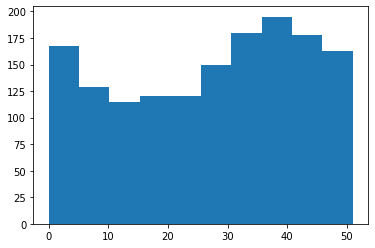

In [214]:
plt.hist(data['Unnamed: 0'])

Observation -

- Data range is between 0 - 51.
- Majority of the values are in 35-38.
- Data is very slightly left skewed.
- This column appears to be the S.No column.

In [215]:
#Checking the date column

len(data['Date'].unique())

104

We have data for 104 different dates

In [216]:
#Checking values for day

data['Date'].dt.day.value_counts()

22    88
15    86
4     80
5     75
3     66
29    58
2     57
19    56
26    55
20    53
13    53
27    52
25    52
18    51
7     50
11    49
10    48
1     47
8     46
17    43
24    42
6     37
31    37
14    36
21    35
12    34
28    33
9     25
16    25
30    24
23    24
Name: Date, dtype: int64

In [217]:
#Number of unique values considering only the day from date column

len(data['Date'].dt.day.unique())

31

Date column has 31 unique values

In [218]:
#Adding day column to our dataframe to check later if it impacts the price

data['Day'] = data['Date'].dt.day

In [219]:
#Checking values for month

data['Date'].dt.month.value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: Date, dtype: int64

We observe that count for feb, oct sept and july are less than 100. Rest are greater than 124.

Highest count is for May

In [220]:
#Adding month column to our dataframe to check later if it impacts the price

data['Month'] = data['Date'].dt.month

In [221]:
#Checking for year values

data['Date'].dt.year.value_counts()

2015    1270
2016     247
Name: Date, dtype: int64

YEar values are either 2015 or 2016.

Values for 2015 are significantly higher than 2016. We also have an year column already present on our database. So will not create a separate column.

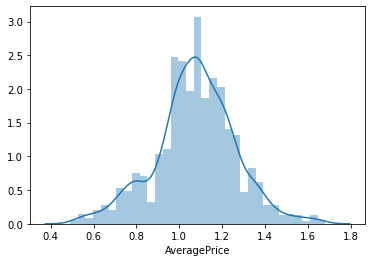

In [222]:
#Plotting the AveragePrice column

sns.distplot(data['AveragePrice'])

(array([ 20.,  47., 113., 169., 433., 393., 211.,  91.,  25.,  15.]),
 array([0.49 , 0.609, 0.728, 0.847, 0.966, 1.085, 1.204, 1.323, 1.442,
        1.561, 1.68 ]),
 <a list of 10 Patch objects>)

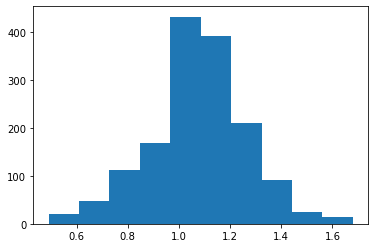

In [223]:
plt.hist(data['AveragePrice'])

The distribution for Average price shows a normal curve, without skewness

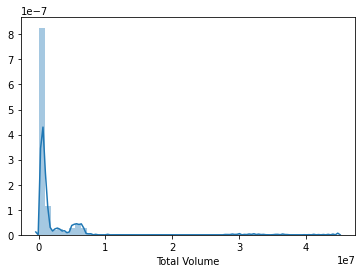

In [224]:
#Plotting the Total Volume column

sns.distplot(data['Total Volume'])

(array([1.35e+03, 1.41e+02, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        9.00e+00, 1.00e+01, 4.00e+00, 2.00e+00]),
 array([3.87507400e+04, 4.50042182e+06, 8.96209289e+06, 1.34237640e+07,
        1.78854350e+07, 2.23471061e+07, 2.68087772e+07, 3.12704483e+07,
        3.57321194e+07, 4.01937904e+07, 4.46554615e+07]),
 <a list of 10 Patch objects>)

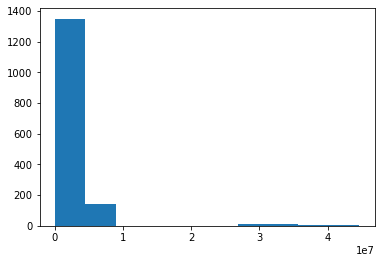

In [225]:
plt.hist(data['Total Volume'])

As expected, the data for Total volume is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

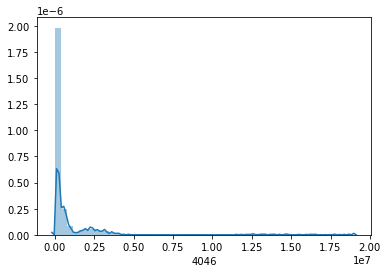

In [226]:
#Plotting the PLU-4046 column

sns.distplot(data['4046'])

(array([1363.,  118.,   11.,    0.,    0.,    0.,    9.,    9.,    5.,
           2.]),
 array([4.67720000e+02, 1.89372475e+06, 3.78698178e+06, 5.68023882e+06,
        7.57349585e+06, 9.46675288e+06, 1.13600099e+07, 1.32532669e+07,
        1.51465240e+07, 1.70397810e+07, 1.89330380e+07]),
 <a list of 10 Patch objects>)

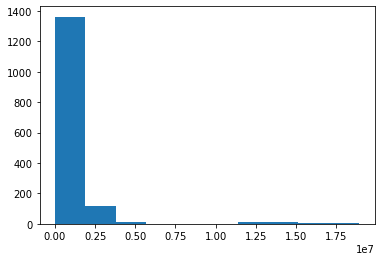

In [227]:
plt.hist(data['4046'])

As expected, the data for PLU-4046 is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

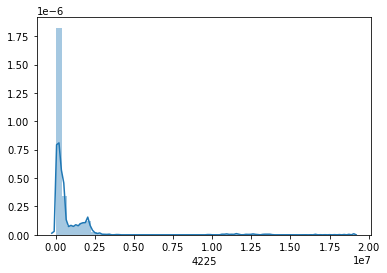

In [228]:
#Plotting the PLU-4225 column

sns.distplot(data['4225'])

(array([1.396e+03, 9.500e+01, 1.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        1.100e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([1.78377000e+03, 1.89725337e+06, 3.79272296e+06, 5.68819256e+06,
        7.58366216e+06, 9.47913175e+06, 1.13746014e+07, 1.32700709e+07,
        1.51655405e+07, 1.70610101e+07, 1.89564797e+07]),
 <a list of 10 Patch objects>)

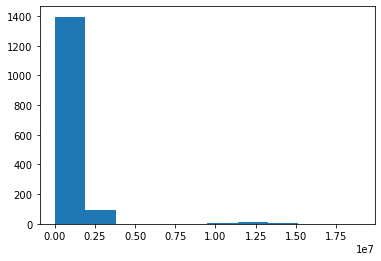

In [229]:
plt.hist(data['4225'])

As expected, the data for 4225 is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

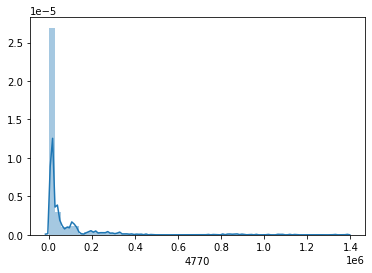

In [230]:
#Plotting the PLU-4770 column

sns.distplot(data['4770'])

(array([1390.,   63.,   34.,    5.,    0.,    4.,   13.,    4.,    2.,
           2.]),
 array([      0.   ,  138151.611,  276303.222,  414454.833,  552606.444,
         690758.055,  828909.666,  967061.277, 1105212.888, 1243364.499,
        1381516.11 ]),
 <a list of 10 Patch objects>)

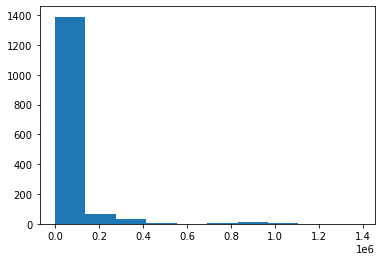

In [231]:
plt.hist(data['4770'])

As expected, the data  for 4770 is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

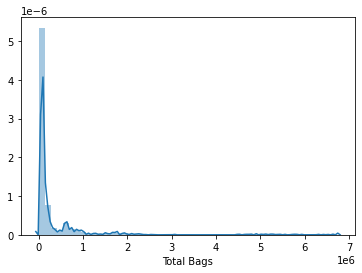

In [232]:
#Plotting the Total Bags column

sns.distplot(data['Total Bags'])

(array([1.363e+03, 7.800e+01, 3.800e+01, 1.200e+01, 1.000e+00, 0.000e+00,
        4.000e+00, 1.200e+01, 6.000e+00, 3.000e+00]),
 array([3.31177000e+03, 6.76610997e+05, 1.34991022e+06, 2.02320945e+06,
        2.69650868e+06, 3.36980791e+06, 4.04310713e+06, 4.71640636e+06,
        5.38970559e+06, 6.06300481e+06, 6.73630404e+06]),
 <a list of 10 Patch objects>)

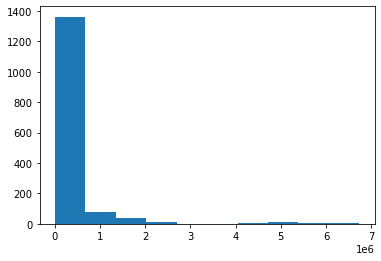

In [233]:
plt.hist(data['Total Bags'])

As expected, the data for Total bags is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

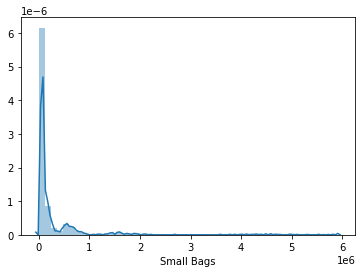

In [234]:
#Plotting the Small Bags column

sns.distplot(data['Small Bags'])

(array([1.365e+03, 7.800e+01, 3.400e+01, 1.400e+01, 1.000e+00, 0.000e+00,
        6.000e+00, 1.200e+01, 5.000e+00, 2.000e+00]),
 array([3.31177000e+03, 5.92344765e+05, 1.18137776e+06, 1.77041075e+06,
        2.35944375e+06, 2.94847675e+06, 3.53750974e+06, 4.12654273e+06,
        4.71557573e+06, 5.30460872e+06, 5.89364172e+06]),
 <a list of 10 Patch objects>)

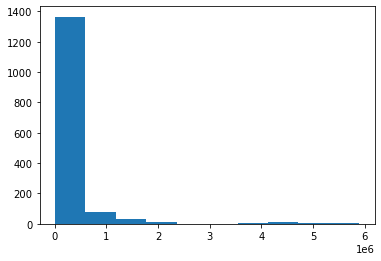

In [235]:
plt.hist(data['Small Bags'])

As expected, the data for Small bags is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

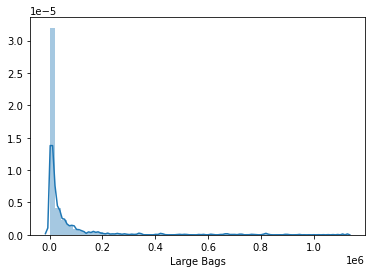

In [236]:
#Plotting the Large Bags column

sns.distplot(data['Large Bags'])

(array([1388.,   65.,   19.,   13.,    4.,    8.,    9.,    7.,    2.,
           2.]),
 array([      0.   ,  112107.647,  224215.294,  336322.941,  448430.588,
         560538.235,  672645.882,  784753.529,  896861.176, 1008968.823,
        1121076.47 ]),
 <a list of 10 Patch objects>)

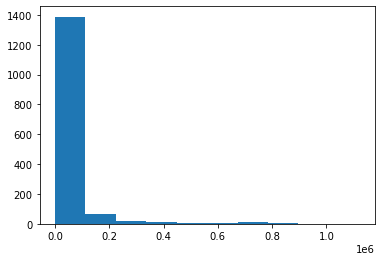

In [237]:
plt.hist(data['Large Bags'])

As expected, the data for Large bags is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

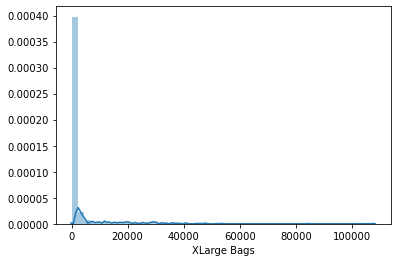

In [238]:
#Plotting the Xlarge Bags column

sns.distplot(data['XLarge Bags'])

(array([1.417e+03, 4.700e+01, 3.100e+01, 1.300e+01, 7.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.   ,  10807.279,  21614.558,  32421.837,  43229.116,
         54036.395,  64843.674,  75650.953,  86458.232,  97265.511,
        108072.79 ]),
 <a list of 10 Patch objects>)

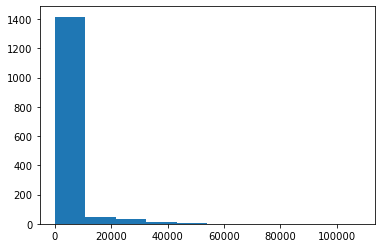

In [239]:
plt.hist(data['XLarge Bags'])

As expected, the data for Xlarge bags is highly right skewed and will need to be treated further. The count for extremely high values is less as can be seen from the histogram and we can choose to drop them later, after considering how our model performs on the data

We will now plot the categorical data
-------------------------------------

In [240]:
#Analysing the type column

data['type'].value_counts()

conventional    1517
Name: type, dtype: int64

The type column has only 1 value - conventional. This column will not allow our model to learn anything, hence we will drop this column while data modeling.

In [241]:
#Analysing the year column

data['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

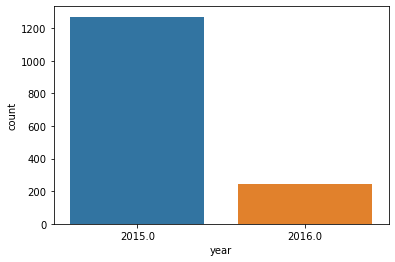

In [242]:
sns.countplot(data['year'])

As we already know, count of data for 2015 is much higher than 2016

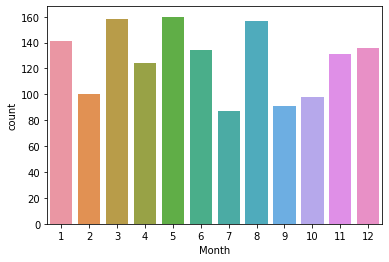

In [243]:
#Analysing the months column

sns.countplot(data['Month'])

We observe that count for feb, oct sept and july are less than 100. Rest are greater than 124.

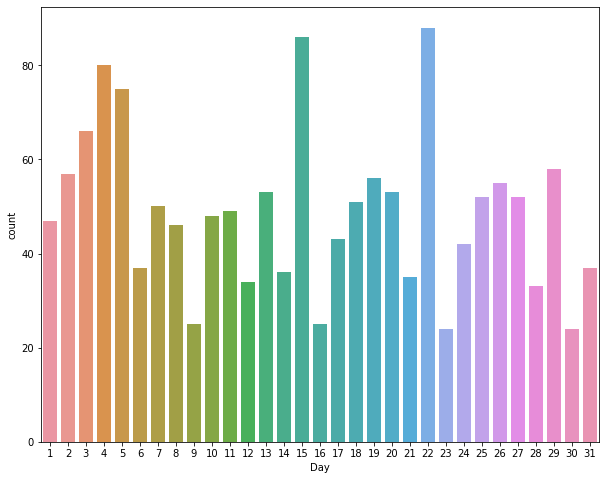

In [244]:
#Analysing the day column

plt.figure(figsize=(10,8))
sns.countplot(data['Day'])

The data is spread in all dates, with highest count for 22,15,4 and 5.

There is no date with 0 count.

In [245]:
#Analysing the region column

data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [246]:
len(data['region'].unique())

51

We have 51 different regions in the dataset where Avocadoes are sold.

In [247]:
data['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

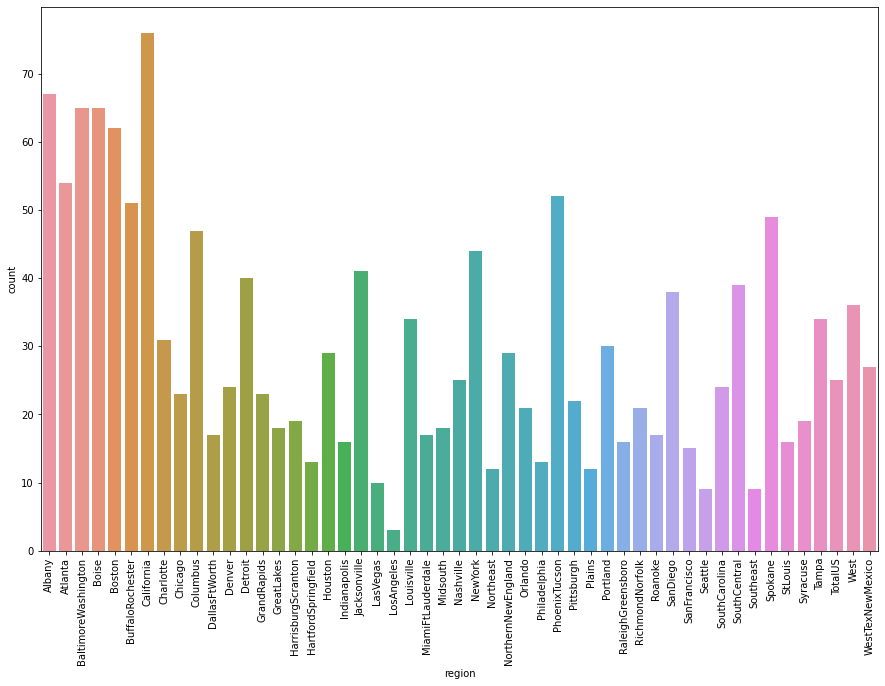

In [248]:
plt.figure(figsize=(15,10))
sns.countplot(data['region'])
plt.xticks(rotation = 90)

Highest count in regions is California and lowest count is for LosAngeles

In [249]:
corr = data.corr()

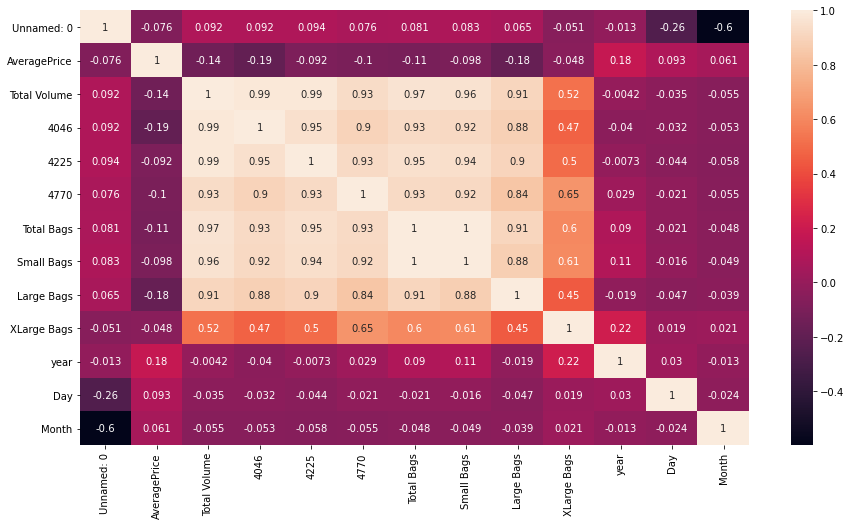

In [250]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True)

From the above heatmap, we observe that -

- There is multicollinearity present in the data which we will need to treat.
- Total volume column in highly correlated with 4046, 4225, 4770, Total bags, Small bags and Large bags. (Above 90%)
- Total volume is moderately correlated with XLarge bags (52%)
- 4046, 4225, 4770, Total bags, Small bags and Large bags are highly correlated with each other (above 90% correlation)
- Xlarge bags shows correlation with 4046, 4225, 4770, Total bags, Small bags and Large bags between 45% to 65%
- The unnamed column is correlated with Months column, with a 60% correlation. Months column is added by us.
- Average price shows highest correlations with year (18%), Total volume (14% negative correlation) and 4046 (19% negative correlation). 

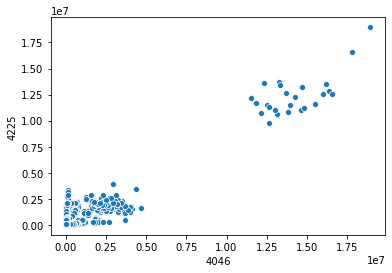

In [251]:
#Relationship between 4046 and 4225 column since the correlation matrix shows a high value

sns.scatterplot(x = data['4046'], y = data['4225'])

Higher values of PLU-4225 have higher values for PLU-4046. The relation is linear.

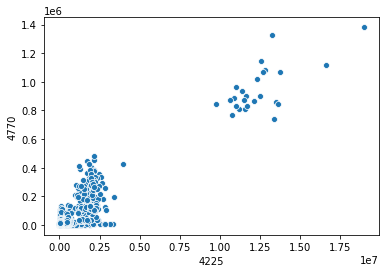

In [252]:
#Relationship between 4770 and 4225 column since the correlation matrix shows a high value

sns.scatterplot(x = data['4225'], y = data['4770'])

Higher values of PLU-4225 have higher values for PLU-4770. The relation is linear.

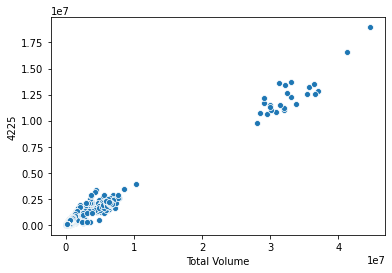

In [253]:
#Relationship between Total Volume and 4225 column since the correlation matrix shows a high value

sns.scatterplot(x = data['Total Volume'], y = data['4225'])

Higher values of Total volume have higher values for PLU-4225. The relation is linear.

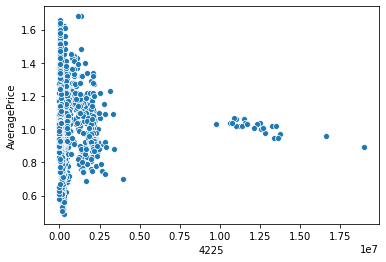

In [254]:
#Checking price relationship with PLU-4225 column

sns.scatterplot(x=data['4225'], y=data['AveragePrice'])

The values which we are expecting to be outliers in 4225 column, are in the price range 1.0 - 1.1 only.

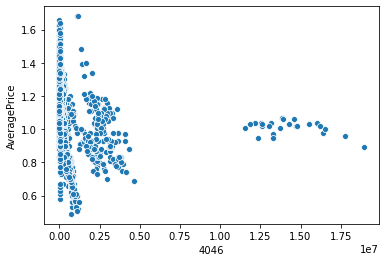

In [255]:
#Checking price relationship with PLU-4046 column

sns.scatterplot(x=data['4046'], y=data['AveragePrice'])

The values which we are expecting to be outliers in 4046 column, are in the price range 0.9 - 1.1 only.

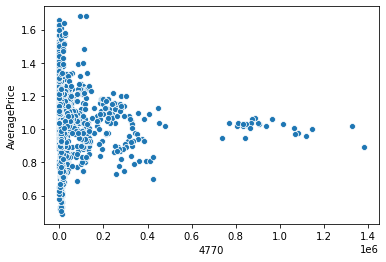

In [256]:
#Checking price relationship with PLU-4770 column

sns.scatterplot(x=data['4770'], y=data['AveragePrice'])

The values which we are expecting to be outliers in 4770 column, are in the price range 0.9 - 1.1 only.

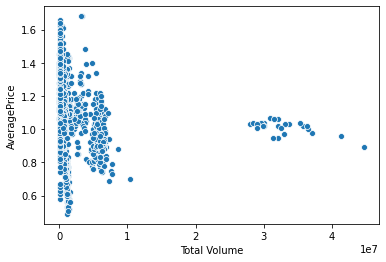

In [257]:
#Checking price relationship with Volume column

sns.scatterplot(x=data['Total Volume'], y=data['AveragePrice'])

No particular relationship is getting defined using this graph.

Text(0.5, 1.0, 'Average Price')

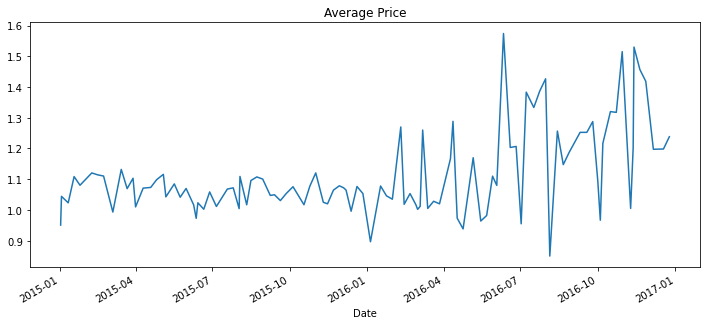

In [258]:
#Analysing price according to grouped dates

dategroup=data.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=data['Date'])
plt.title('Average Price')

Observation -

The price fluctuation is more in 2016 and the prices are higher in 2016

Text(0.5, 1.0, 'Average Price')

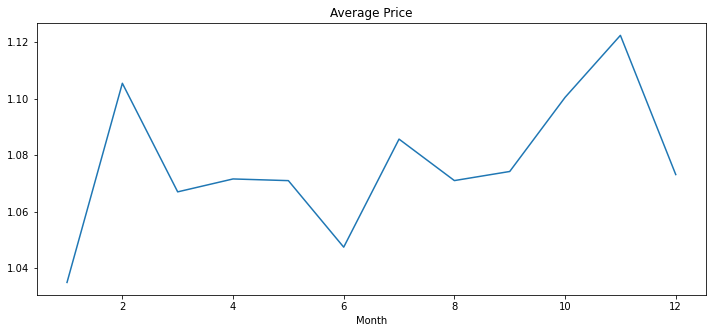

In [259]:
#Analysing price according to grouped months


monthgroup=data.groupby('Month').mean()
plt.figure(figsize=(12,5))
monthgroup['AveragePrice'].plot(x=data['Month'])
plt.title('Average Price')

Observation -

The price goes down in month 3 to 9, and is highest in 10 to 12.

Text(0.5, 1.0, 'Average Price')

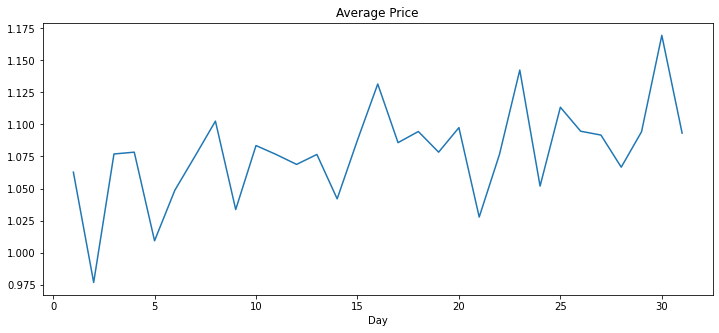

In [260]:
#Analysing price according to grouped day


daygroup=data.groupby('Day').mean()
plt.figure(figsize=(12,5))
daygroup['AveragePrice'].plot(x=data['Day'])
plt.title('Average Price')


Observation - 

Price goes up as the date is increasing.

Text(0.5, 1.0, 'Average Price')

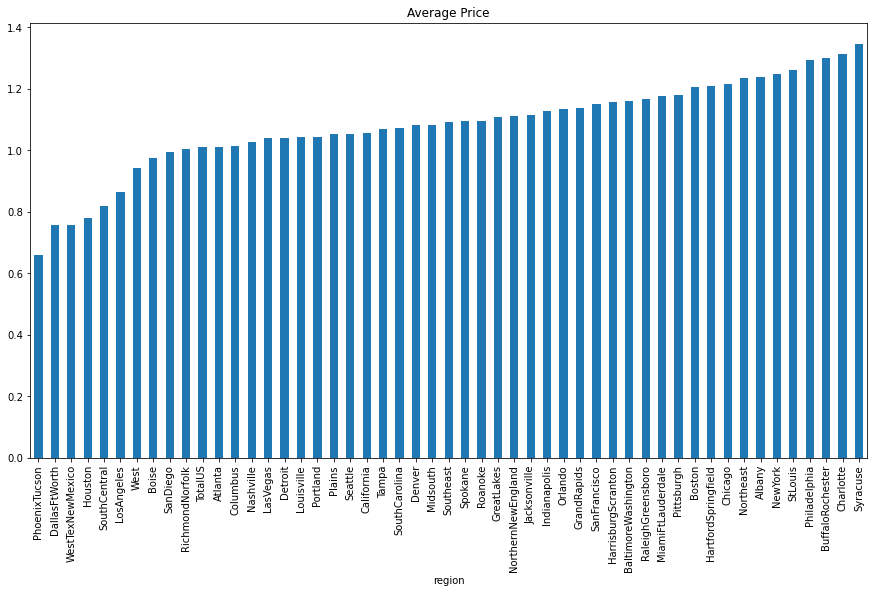

In [261]:
#Analysing price according to grouped day


regiongroup=data.groupby('region').mean()
plt.figure(figsize=(15,8))
regiongroup['AveragePrice'].sort_values().plot(x=data['region'], kind = 'bar')
plt.title('Average Price')

Observations -

Mean prices are fluctuating as per regions, highest price is in Syracuse and lowest is in PhoenixTucson

Conclusions for EDA part -

- Data contains multicollinearity.
- Majority of the columns are right skewed.
- Outliers are expected in 4046, 4225, 4770, Total bags, small bags, large bags and Xlarge bags column.
- Prices change according to year, months, region, days

We will now proceed to the data modelling part.

# Data modeling

In [262]:
#Dropping the type colimn since the data has only one type of value

data.drop('type', axis=1, inplace = True)

In [263]:
#Dropping the unnamed column since the column appears to be serial number, and is not impacting the data

data.rename({'Unnamed: 0':'remove_this'}, axis = 'columns', inplace = True) #rename the column to drop it by the normal method
data.drop('remove_this', axis = 1, inplace = True)

In [264]:
#Data has no missing value so no data replacement/filling is required

# Outlier detection and removal

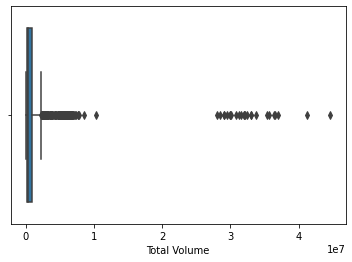

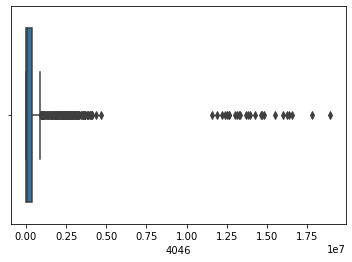

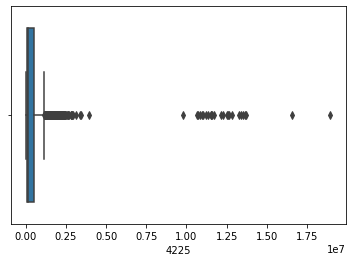

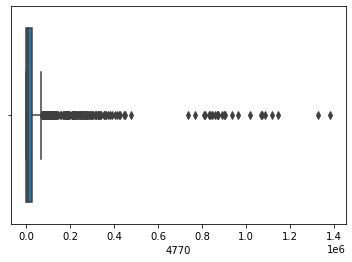

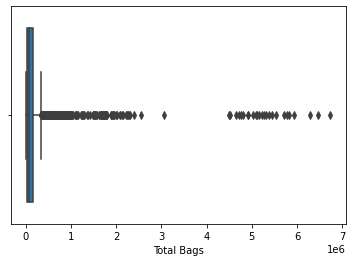

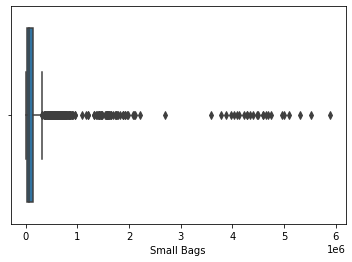

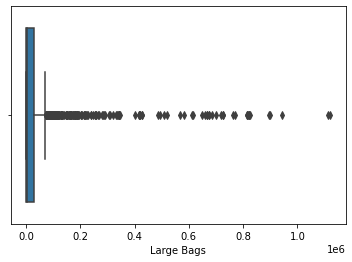

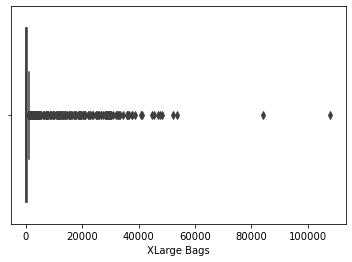

In [265]:
numerical_data = ['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

for i in numerical_data:
    sns.boxplot(data[i])
    plt.show()

All numerical columns have outliers, hence we will now calculate zscore values and check how much data we will lose in case we drop the outliers.

In [266]:
from scipy.stats import zscore

In [267]:
zs = zscore(data.drop(['Date','region'], axis = 1))

In [268]:
zs

array([[ 1.35048079, -0.34696593, -0.33149016, ..., -0.44100815,
         1.31052998,  1.62415427],
       [ 1.45639674, -0.34907791, -0.33167633, ..., -0.44100815,
         0.52953678,  1.62415427],
       [-0.76783831, -0.33478463, -0.33161448, ..., -0.44100815,
        -0.25145642,  1.62415427],
       ...,
       [ 2.14485045, -0.32120275, -0.30820887, ...,  2.26753179,
        -0.58616779, -1.25685839],
       [ 2.09189247, -0.31878364, -0.30423037, ...,  2.26753179,
         1.08738906,  0.75985047],
       [ 1.88006056, -0.3201721 , -0.30987728, ...,  2.26753179,
         0.30639586,  0.75985047]])

In [269]:
df = data[((abs(zs)<3).all(axis=1))] #By running this command, we are checking for data which does not contain outliers

Removing the outlier values will lead to 5% data loss.


In [270]:
data[((abs(zs)<3).all(axis=1))==False]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
398,2015-07-06,1.13,3602112.79,689242.14,1723625.04,447117.42,742128.19,584086.31,122232.65,35809.23,2015.0,GreatLakes,6,7
401,2015-05-17,1.09,3753201.03,787079.55,1939235.30,406338.23,620547.95,481046.82,110126.40,29374.73,2015.0,GreatLakes,17,5
409,2015-03-22,1.04,3746598.18,543151.72,2146436.50,451798.84,605211.12,453829.96,105804.36,45576.80,2015.0,GreatLakes,22,3
412,2015-01-03,1.02,3566752.43,353818.94,2135517.89,478701.64,598713.96,462539.26,88541.92,47632.78,2015.0,GreatLakes,3,1
760,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,2015.0,PhoenixTucson,27,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2016-05-22,0.90,6501981.08,2238875.14,2178820.82,329737.94,1754547.18,1594507.01,129666.02,30374.15,2016.0,California,22,5
1483,2016-08-05,0.79,7808461.74,2716222.01,2615648.28,336387.90,2140203.55,1606311.87,508755.56,25136.12,2016.0,California,5,8
1484,2016-01-05,0.75,7661483.37,2817406.20,2628579.48,291448.73,1924048.96,1421239.87,485685.06,17124.03,2016.0,California,5,1
1495,2016-02-14,0.82,6807283.15,1998149.71,1974912.11,278558.48,2555662.85,2207054.69,333029.79,15578.37,2016.0,California,14,2


Since we will be loosing 5% data (81 rows) and rows do not show any specific arrangement we will drop the data and use df as our dataset

In [271]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany,13,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte,16,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte,10,9
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte,10,2
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte,25,9


# Skewness removal

We will now check skewness present in the data

In [272]:
df.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
Day             0.041849
Month           0.111898
dtype: float64

Considering the threshold value as 0.5, following columns need to be treated for skewness

- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags


All of these columns are positively skewed, hence we will try to transform them.

Year column is categorical in nature, hence we will not remove skewness from it.

Trying to log transform the data first.
We will skip 4770, Large bags and Xlarge bags from log transform since it contains 0 values and will result in NaN.

In [273]:
l = ['Total Volume', '4046', '4225','Total Bags', 'Small Bags']

In [274]:
for col in l:
    df[col] = np.log(abs(df[col]))

In [275]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.011274
4770            3.331191
Total Bags      0.378608
Small Bags      0.420794
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
Day             0.041849
Month           0.111898
dtype: float64

Using cuberoot transform for 4770, Large bags and Xlarge bags

In [276]:
for col in ['4770','Large Bags','XLarge Bags']:
    df[col] = np.cbrt(abs(df[col]))

In [277]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.011274
4770            1.076970
Total Bags      0.378608
Small Bags      0.420794
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
Day             0.041849
Month           0.111898
dtype: float64

In [278]:
# Doing cbrt transform again since we have not yet received the expected result

for col in ['4770','Large Bags','XLarge Bags']:
    df[col] = np.sqrt(abs(df[col]))


In [279]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.011274
4770            0.301946
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     0.865708
year            2.004439
Day             0.041849
Month           0.111898
dtype: float64

In [280]:
#Doing sqrt transform on XLarge bags again to achieve the skewness within threshold

df['XLarge Bags'] = np.sqrt(df['XLarge Bags'])

In [281]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.011274
4770            0.301946
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     0.419500
year            2.004439
Day             0.041849
Month           0.111898
dtype: float64

We have now successfully achieved the desired skewness for our data

In [282]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,2015-12-27,1.33,11.070329,6.943836,10.905127,1.907426,9.070718,9.059938,2.129486,0.000000,2015.0,Albany,27,12
1,2015-12-20,1.35,10.912849,6.513645,10.706359,1.969316,9.159632,9.149323,2.145326,0.000000,2015.0,Albany,20,12
2,2015-12-13,0.93,11.680304,6.677965,11.600475,2.252173,9.005202,8.992459,2.165565,0.000000,2015.0,Albany,13,12
3,2015-06-12,1.08,11.277104,7.031741,11.184094,2.042378,8.667535,8.644249,2.261454,0.000000,2015.0,Albany,12,6
4,2015-11-29,1.28,10.840357,6.847453,10.688265,2.057118,8.729713,8.697222,2.413593,0.000000,2015.0,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,12.159222,10.960046,10.939633,5.096879,10.992360,10.795968,4.668628,1.579040,2016.0,Charlotte,16,10
1513,2016-09-10,1.51,12.090862,10.676505,10.862639,5.184497,11.055652,10.909695,4.526065,0.000000,2016.0,Charlotte,10,9
1514,2016-02-10,1.48,12.091844,10.744295,10.876033,5.057617,11.041573,10.884303,4.495871,1.749999,2016.0,Charlotte,10,2
1515,2016-09-25,1.47,12.150198,10.898789,10.889185,5.095116,11.065571,10.926900,4.497693,0.000000,2016.0,Charlotte,25,9


# Encoding the categorical variables

We will be encoding date, day, months and region column using LabelEncoder.


In [283]:
from sklearn.preprocessing import LabelEncoder

In [284]:
le = LabelEncoder()

In [285]:
df['Date'] = le.fit_transform(df['Date'])
df['Day'] = le.fit_transform(df['Day'])
df['Month'] = le.fit_transform(df['Month'])
df['region'] = le.fit_transform(df['region'])

In [286]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,51,1.33,11.070329,6.943836,10.905127,1.907426,9.070718,9.059938,2.129486,0.000000,2015.0,0,26,11
1,50,1.35,10.912849,6.513645,10.706359,1.969316,9.159632,9.149323,2.145326,0.000000,2015.0,0,19,11
2,49,0.93,11.680304,6.677965,11.600475,2.252173,9.005202,8.992459,2.165565,0.000000,2015.0,0,12,11
3,22,1.08,11.277104,7.031741,11.184094,2.042378,8.667535,8.644249,2.261454,0.000000,2015.0,0,11,5
4,46,1.28,10.840357,6.847453,10.688265,2.057118,8.729713,8.697222,2.413593,0.000000,2015.0,0,28,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,93,1.39,12.159222,10.960046,10.939633,5.096879,10.992360,10.795968,4.668628,1.579040,2016.0,7,15,9
1513,87,1.51,12.090862,10.676505,10.862639,5.184497,11.055652,10.909695,4.526065,0.000000,2016.0,7,9,8
1514,56,1.48,12.091844,10.744295,10.876033,5.057617,11.041573,10.884303,4.495871,1.749999,2016.0,7,9,1
1515,89,1.47,12.150198,10.898789,10.889185,5.095116,11.065571,10.926900,4.497693,0.000000,2016.0,7,24,8


# Scaling the data

We will now scale the data using Standard scaler, which will help our model to learn better, using normalized values.

In [287]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [288]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = df.drop('AveragePrice', axis = 'columns')
y = df['AveragePrice']

In [289]:
ds_x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,51,11.070329,6.943836,10.905127,1.907426,9.070718,9.059938,2.129486,0.000000,2015.0,0,26,11
1,50,10.912849,6.513645,10.706359,1.969316,9.159632,9.149323,2.145326,0.000000,2015.0,0,19,11
2,49,11.680304,6.677965,11.600475,2.252173,9.005202,8.992459,2.165565,0.000000,2015.0,0,12,11
3,22,11.277104,7.031741,11.184094,2.042378,8.667535,8.644249,2.261454,0.000000,2015.0,0,11,5
4,46,10.840357,6.847453,10.688265,2.057118,8.729713,8.697222,2.413593,0.000000,2015.0,0,28,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,93,12.159222,10.960046,10.939633,5.096879,10.992360,10.795968,4.668628,1.579040,2016.0,7,15,9
1513,87,12.090862,10.676505,10.862639,5.184497,11.055652,10.909695,4.526065,0.000000,2016.0,7,9,8
1514,56,12.091844,10.744295,10.876033,5.057617,11.041573,10.884303,4.495871,1.749999,2016.0,7,9,1
1515,89,12.150198,10.898789,10.889185,5.095116,11.065571,10.926900,4.497693,0.000000,2016.0,7,24,8


In [290]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [291]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [292]:
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,0.810817,-1.410939,-1.847534,-0.507900,-1.487763,-1.822398,-1.648581,-0.924748,-0.865803,-0.413870,-1.325962,1.308085,1.637005
1,0.768266,-1.535665,-2.043228,-0.635166,-1.449838,-1.746838,-1.573650,-0.916651,-0.865803,-0.413870,-1.325962,0.528523,1.637005
2,0.725714,-0.927829,-1.968479,-0.062686,-1.276504,-1.878074,-1.705149,-0.906306,-0.865803,-0.413870,-1.325962,-0.251039,1.637005
3,-0.423173,-1.247170,-1.807546,-0.329285,-1.405065,-2.165026,-1.997053,-0.857289,-0.865803,-0.413870,-1.325962,-0.362405,-0.096578
4,0.598060,-1.593080,-1.891379,-0.646751,-1.396033,-2.112188,-1.952646,-0.779518,-0.865803,-0.413870,-1.325962,1.530817,1.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,2.597975,-0.548519,-0.020561,-0.485807,0.466723,-0.189369,-0.193271,0.373215,1.033340,2.416215,-0.880622,0.083059,1.059144
1432,2.342667,-0.602661,-0.149544,-0.535104,0.520415,-0.135583,-0.097933,0.300340,-0.865803,2.416215,-0.880622,-0.585137,0.770213
1433,1.023574,-0.601884,-0.118707,-0.526528,0.442663,-0.147547,-0.119219,0.284905,1.238956,2.416215,-0.880622,-0.585137,-1.252300
1434,2.427769,-0.555666,-0.048427,-0.518108,0.465642,-0.127153,-0.083511,0.285837,-0.865803,2.416215,-0.880622,1.085353,0.770213


We have successfully completed the scaling of data and have got normalized values for our dataset.

# Fitting the data in Regression models

In [293]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [294]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [295]:
#Finding best random state, fitting models and checking for regression metrics

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    for i in [dt, svr, knn, lr]:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        test_score = r2_score(y_test, pred)
        train_score = r2_score(y_train,i.predict(x_train))
        if abs(train_score - test_score) <= 0.009:
            print(i)
            print('At random state ',k)
            print('R2 score is ',r2_score(y_test, pred))
            print('R2 for train data', r2_score(y_train,i.predict(x_train)))
            print('Mean absolute error is ',mean_absolute_error(y_test, pred))
            print('Mean squared error is ', mean_squared_error(y_test, pred))
            print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
            print('------------------------------------------')

LinearRegression()
At random state  2
R2 score is  0.3934712410158988
R2 for train data 0.39931798833635956
Mean absolute error is  0.11604012257968187
Mean squared error is  0.02215174180458722
Root mean squared error is  0.14883461225329012
------------------------------------------
LinearRegression()
At random state  13
R2 score is  0.39426218731724383
R2 for train data 0.3995680071134027
Mean absolute error is  0.1121811740697952
Mean squared error is  0.021213963996744207
Root mean squared error is  0.14565014245356647
------------------------------------------
LinearRegression()
At random state  24
R2 score is  0.3925801489624302
R2 for train data 0.39835155991645876
Mean absolute error is  0.11393712685673046
Mean squared error is  0.0216992576025973
Root mean squared error is  0.1473066787440315
------------------------------------------
LinearRegression()
At random state  38
R2 score is  0.40157808914367066
R2 for train data 0.39387896225803554
Mean absolute error is  0.118126

The above methods show very less r2 scores (39/40%). We will check if ensemble methods give us a better score

# Ensemble methods 

In [296]:
#Importing the random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [297]:
rfr = RandomForestRegressor()

In [298]:
#Finding the best random state, fitting the data and predicting scores

test_score_list = []

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    rfr.fit(x_train, y_train)
    pred = rfr.predict(x_test)
    test_score = r2_score(y_test, pred)
    test_score_list.append(test_score)
    train_score = r2_score(y_train,rfr.predict(x_train))
    if abs(train_score - test_score) <= 0.14:
        print('At random state ',k)
        print('R2 score for test data is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

At random state  3
R2 score for test data is  0.8308756588907582
R2 for train data 0.9691974528958922
Mean absolute error is  0.05623225058004636
Mean squared error is  0.005709014686774938
Root mean squared error is  0.07555802198823722
------------------------------------------
At random state  68
R2 score for test data is  0.8324616421057164
R2 for train data 0.9686345261559135
Mean absolute error is  0.0595296983758701
Mean squared error is  0.006090141832946639
Root mean squared error is  0.07803936079278609
------------------------------------------
At random state  83
R2 score for test data is  0.8430275640473951
R2 for train data 0.9707358674904608
Mean absolute error is  0.056483294663573096
Mean squared error is  0.005669257331786545
Root mean squared error is  0.07529447079159628
------------------------------------------
At random state  85
R2 score for test data is  0.832411631821621
R2 for train data 0.9678453515060986
Mean absolute error is  0.0611967517401392
Mean squar

In [299]:
max(test_score_list)

0.8430275640473951

We receive a better scoring for Random Forest Regressor at random state = 83

# Cross Validation

In [300]:
#Importing cross val score from Model_selection

from sklearn.model_selection import cross_val_score

In [301]:
for i in range(2,9):
    cv = cross_val_score(rfr, x, y, cv=i, scoring = 'r2')
    print('For cv {}, values are {}, mean is {}'.format(i,cv,cv.mean()))

For cv 2, values are [-0.54025336  0.37088582], mean is -0.08468376841541919
For cv 3, values are [0.29471414 0.38548291 0.28216178], mean is 0.3207862767260589
For cv 4, values are [ 0.14618302 -0.02296162  0.49716879  0.30779686], mean is 0.23204676134082525
For cv 5, values are [-0.16085253  0.29451033  0.47539485  0.39607886  0.31405756], mean is 0.2638378155311707
For cv 6, values are [-0.379787    0.52286899 -0.41950869  0.62302283  0.35324407  0.34158523], mean is 0.17357090434273936
For cv 7, values are [ 0.05601145  0.19899465  0.26383075  0.61066963 -0.22212619  0.51126595
  0.00225369], mean is 0.20298570676020455
For cv 8, values are [-0.05430902  0.25672219  0.4565751  -0.40707049  0.67246636  0.0385964
  0.67430475 -0.20530631], mean is 0.17899737270407812


The best mean value for cross val scores here is 0.31 at cv = 3, which is quite low than our actual score. 
The cross validation is even lesser than the ML algorithms r2 score.

k-Folds methods is not working quite well to train our model, the model is not able to learn properly.

We will try to hypertune our model to check if it prevents overfitting by any means.

# Hypertuning the best model

We will now try to find the best parameters for the model using GridSearch CV

In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [304]:
param_grid = {'n_estimators':[10, 30, 50, 70, 100], 'max_depth':[None,1,2,3], 'max_samples' : [50,100,250,500,1000], 'min_samples_split':[2,4,10]}

gcv_rfr = GridSearchCV(rfr,param_grid, cv=3)

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 83)

In [306]:
#Fitting the model

res = gcv_rfr.fit(x_train,y_train)

In [307]:
#Checking best params

res.best_params_

{'max_depth': None,
 'max_samples': 500,
 'min_samples_split': 4,
 'n_estimators': 100}

The only change in params from default values is max_samples and min_samples_split, hence we will create a model instance using this parameter

In [308]:
res.best_score_

0.735996848163953

In [309]:
#Creating model instance with best params

model = RandomForestRegressor(max_samples=500, min_samples_split=4, random_state = 83)

In [310]:
#Fitting the final model

model.fit(x_train, y_train)

RandomForestRegressor(max_samples=500, min_samples_split=4, random_state=83)

In [311]:
#Prediction using the final model

pred = model.predict(x_test)

In [312]:
print('R2 score for test data is ',r2_score(y_test, pred))
print('R2 for train data', r2_score(y_train,model.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))
print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))

R2 score for test data is  0.8124869312703938
R2 for train data 0.9004436819431242
Mean absolute error is  0.061911036073362034
Mean squared error is  0.006772270770022875
Root mean squared error is  0.08229380760435669


We were able to reduce overfitting on train data using hypertuning technique - GridSearch cv.

# Saving the best model

In [313]:
import joblib

joblib.dump(model, 'avocado.obj')

['avocado.obj']

# Conclusion

In [314]:
#Loading the saved model

avocado_model = joblib.load('avocado.obj')

In [315]:
#Prediction using saved model

results = avocado_model.predict(x_test)

In [316]:
#Creating a dataframe with actual and predicted values

price = pd.DataFrame({'Actual':y_test,'Predicted':results})

In [317]:
#Print the result

price

,Actual,Predicted
50,1.24,1.130817
991,1.14,1.069802
25,1.35,1.183979
1367,1.26,1.128326
229,1.26,1.212657
...,...,...
884,1.11,1.119340
1482,0.97,0.940232
530,0.99,1.055260
358,1.04,1.032770


We have created a model above, which predicts the Win score to ~81% accuracy. The absolute error is around 0.06.
MSE = 0.006 and RMSE = 0.08.

We used the Random Forest Regression model as the final model, since it has reduced overfitting and gave us good results.

Random Forest Regressor is giving a much better score than other Regression models.